This is a file for debugging and experimenting with `token_scoring.py` and `test_token_scoring.py`

# Import Libraries & Dataset

In [1]:
from transformers import AutoTokenizer
from datasets import load_dataset
import pandas as pd
from tqdm import tqdm

from token_scoring import *
from test_token_scoring import *

# Use sample from FLORES+ dataset 
flores_sample = load_dataset("openlanguagedata/flores_plus", split='dev').to_pandas().sample(10)

Resolving data files:   0%|          | 0/218 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/213 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/218 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/213 [00:00<?, ?it/s]

In [2]:
relevant_columns = ['language', 'text']
flores_sample = flores_sample.rename(columns={'iso_15924':'language'})[relevant_columns].reset_index()
print(flores_sample.shape)
flores_sample.head(2)

(10, 3)


,index,language,text
0,179951,Latn,Induskulturen var en bronsålderscivilisation p...
1,83580,Latn,Pos periksa imigrasi biasanya jadi perhentian ...


# Try Functions from `token_scoring.py`

In [3]:
text = flores_sample['text'][0]

fertility_score, tokens = fertility(text)
print('Fertility Score:', fertility_score)
print('Tokens:', tokens)

Fertility Score: 2.2
Tokens: ['Ind', 'usk', 'ulture', 'n', 'Ġvar', 'Ġen', 'Ġbr', 'ons', 'Ã¥', 'ld', 'ers', 'civil', 'isation', 'ĠpÃ¥', 'Ġden', 'Ġnord', 'vÃ¤', 'stra', 'Ġind', 'iska', 'Ġsub', 'kont', 'inent', 'en', 'Ġsom', 'Ġom', 'f', 'att', 'ade', 'Ġst', 'Ã¶r', 're', 'Ġdel', 'en', 'Ġav', 'Ġdag', 'ens', 'ĠPakistan', 'Ġsamt', 'Ġv', 'issa', 'Ġregion', 'er', 'Ġi', 'Ġnord', 'vÃ¤', 'stra', 'ĠInd', 'ien', 'Ġoch', 'Ġnord', 'Ã¶', 'stra', 'ĠAfghanistan', '.']


In [4]:
text = flores_sample['text'][0]
tokenizer = AutoTokenizer.from_pretrained('microsoft/Phi-3.5-mini-instruct')

fertility_score, tokens = fertility(text, tokenizer)
print('Fertility Score:', fertility_score)
print('Tokens:', tokens)

Fertility Score: 2.24
Tokens: ['▁Ind', 'usk', 'ultur', 'en', '▁var', '▁en', '▁br', 'ons', 'å', 'ld', 'ers', 'c', 'ivil', 'isation', '▁på', '▁den', '▁nord', 'vä', 'stra', '▁ind', 'iska', '▁sub', 'k', 'ont', 'inent', 'en', '▁som', '▁om', 'f', 'atta', 'de', '▁stör', 're', '▁delen', '▁av', '▁dag', 'ens', '▁Pakistan', '▁samt', '▁v', 'issa', '▁region', 'er', '▁i', '▁nord', 'vä', 'stra', '▁Ind', 'ien', '▁och', '▁nord', 'ö', 'stra', '▁Afghan', 'istan', '.']


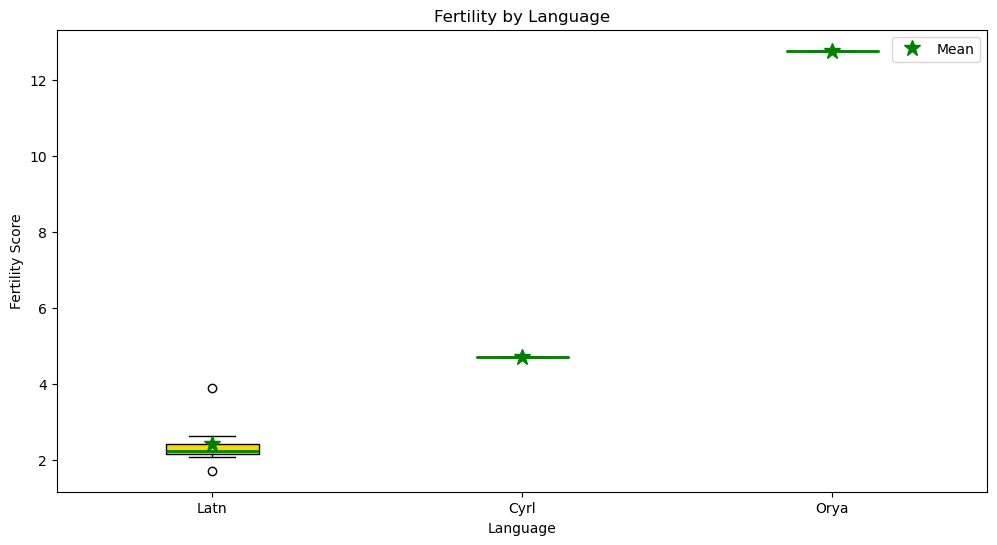

In [5]:
scored = get_fertilities(flores_sample, visualize=True)

In [6]:
scored

,index,language,text,fertility,tokens
0,179951,Latn,Induskulturen var en bronsålderscivilisation p...,2.200000,"[Ind, usk, ulture, n, Ġvar, Ġen, Ġbr, ons, Ã¥,..."
1,83580,Latn,Pos periksa imigrasi biasanya jadi perhentian ...,2.375000,"[Pos, Ġper, ik, sa, Ġim, igr, asi, Ġbias, anya..."
2,32317,Latn,"Znamo mnoge grčke političare, naučnike i umjet...",2.625000,"[Z, nam, o, Ġmn, oge, Ġgr, Äį, ke, Ġpolit, iÄį..."
3,173945,Latn,"Ho latela mehla eo, Qhobosheane ya Kirby Muxlo...",2.240000,"[Ho, Ġlat, ela, Ġme, h, la, Ġeo, ,, ĠQ, h, ob,..."
4,190536,Latn,Dispela 'capsule' bai i ron long kain olsem 12...,1.722222,"[Disp, ela, Ġ', caps, ule, ', Ġb, ai, Ġi, Ġr, ..."
5,198697,Cyrl,"""Луно"" буступ каарга база күштүг хат ону чалгы...",4.705882,"["", ÐĽ, Ñĥ, Ð½Ð¾, "", ĠÐ±, ÑĥÑģÑĤ, ÑĥÐ¿, ĠÐºÐ°,..."
6,191437,Latn,Nadal o kgobokantse dintlha tsa 88% mo motsham...,2.238095,"[N, adal, Ġo, Ġkg, ob, ok, ant, se, Ġdint, l, ..."
7,116848,Latn,"""Ngela menji kupingana ku mudimu mu dimue,"" mu...",2.090909,"["", Ng, ela, Ġmen, ji, Ġkup, ing, ana, Ġku, Ġm..."
8,178290,Latn,Buka kutsi nguluphi luhambo lomdayisi layilukh...,3.909091,"[B, uka, Ġk, uts, i, Ġng, ul, up, hi, Ġlu, ham..."
9,146717,Orya,"7 ପଏଣ୍ଟ ପଛରେ, ଜନସନ 2,243 ସହିତ ଦ୍ଵିତୀୟ ସ୍ଥାନରେ ...",12.777778,"[7, Ġà, ¬, ª, à, ¬, ı, à, ¬, £, à, Ń, į, à, ¬,..."
